# AT82.08 Computer Vision Midterm Exam

Date & Time: Nov 29, 2025. From 0900 - 1200

Exam Duration: 3 Hours

Total Score: 100 Points = TQ(50 points) + IQ (50 points)

## How to submit
1. Zip the downloaded folder, and it should contain
- jupyter notebook
- any images you added to the notebook should be in `assets/`.

*If the zip file is larger than 8 MB, you can split them into two zip files, one contains jupyter notebook, and other contains assets.*

2. Submit the zip on `TEAL`

# Theoretical Questions

## TQ1-[5 Points] : Stochastic Gradient Descent

Given the stochastic Gradient Descent

> **Algorithm**
> 1. Initialize weights randomly $\mathcal{N}(0,\sigma^2)$
> 2. Loop until convergence:
>   * Pick single data point *i*
>   * Compute gradient $\frac{\partial J_i(W)}{\partial W}$
>   * Update weights $W \larr W - \eta\frac{\partial J(W)}{\partial W}$ 
> 3. Return weights

**What are advantages and disadvantages of this method? How can we address the drawback of this method?**


Your answer here

Advantages:

Very fast updates.

Works well with large datasets.

Can escape local minima due to noise.

Disadvantages:

Updates are noisy and unstable.

Sensitive to learning rate.

May not converge smoothly (oscillates).

How to fix:
Use mini-batches, momentum, Adam/RMSProp, or a learning-rate schedule to stabilize and speed up convergence.

## TQ2-[10 Points] : What are the purpose and properties of activation function?

Your answer here

## TQ3-[5 Points] : What is the effective receptive field size of each neuron in layer `L=5` with `3x3` kernel size in each layer ?

*Please show your solution, not just the answer*

Your answer here

### Solution

Given:
- Kernel size: \( 3 \times 3 \)
- Stride: \( s = 1 \)
- No dilation or pooling
- Receptive field formula for stride 1:

\[
R_L = R_{L-1} + (k - 1)
\]

Start with:

\[
R_1 = 3
\]

Compute layer by layer:

- **Layer 1:**  
  \[
  R_1 = 3
  \]

- **Layer 2:**  
  \[
  R_2 = 3 + 2 = 5
  \]

- **Layer 3:**  
  \[
  R_3 = 5 + 2 = 7
  \]

- **Layer 4:**  
  \[
  R_4 = 7 + 2 = 9
  \]

- **Layer 5:**  
  \[
  R_5 = 9 + 2 = 11
  \]

### **Final Answer**

\[
\boxed{11 \times 11}
\]



## TQ4-[10 Points] : We've explored the evolution of the `R-CNN family`, encompassing `R-CNN`, `Fast R-CNN`, and `Faster R-CNN`. Analyze the key differences between these models, identifying their respective limitations and the specific challenges they were developed to overcome.

Your answer here

### **TQ4 – Differences Between R-CNN, Fast R-CNN, and Faster R-CNN**

Below is a structured comparison showing **how each model improves** over the previous one.

---

## **1. R-CNN (Region-CNN, 2014)**

### **How it works**
- Uses **Selective Search** to generate ~2000 region proposals.
- Each proposal is **cropped and passed through a CNN** individually.
- SVM used for classification + separate bounding box regressor.

### **Limitations**
- **Very slow** (2,000 forward passes per image).
- **Training is multi-stage** (CNN → SVM → bbox regressor).
- Requires **feature extraction for every region**, leading to high computation and storage cost.

### **Challenge addressed by Fast R-CNN**
- Need for **shared computation** and **end-to-end training**.

---

## **2. Fast R-CNN (2015)**

### **How it works**
- Run **one CNN over the whole image** to extract feature maps.
- Use **RoI Pooling** to extract features for each region proposal.
- Single network outputs class + bbox regression.

### **Improvements over R-CNN**
- **1 forward pass per image**, not 2,000.
- **End-to-end training** with multi-task loss.
- Much **faster** and more memory-efficient.

### **Limitations**
- Still depends on **Selective Search**, which takes ~2 seconds per image.
- Region proposal step is still a **separate, slow CPU process**.

### **Challenge addressed by Faster R-CNN**
- Need to **replace Selective Search** with a learnable, fast module.

---

## **3. Faster R-CNN (2016)**

### **How it works**
- Introduces **Region Proposal Network (RPN)**.
- RPN shares convolutional layers with the detection network.
- Generates region proposals directly from feature maps.

### **Improvements over Fast R-CNN**
- Removes Selective Search entirely.
- Proposals are generated **on GPU** and **end-to-end trained**.
- Achieves **real-time or near real-time** region proposal generation.

### **Limitations**
- Still a **two-stage** detector (slower than YOLO/SSD).
- More complex architecture.
- Less suited for very large-scale or ultra-fast applications.

---

## **Summary Table**

| Model          | Main Idea                          | Key Limitation | Improvement Introduced |
|----------------|-------------------------------------|----------------|--------------------------|
| **R-CNN**      | CNN per proposal + selective search | Extremely slow | Use shared features (Fast R-CNN) |
| **Fast R-CNN** | Shared CNN + RoI pooling            | Selective search still slow | Add RPN (Faster R-CNN) |
| **Faster R-CNN** | RPN for proposal generation        | Still 2-stage detector | Later solved by single-stage models (YOLO/SSD) |

---

### **Final Answer Summary**
- **R-CNN**: Accurate but extremely slow; solves object detection with deep features but suffers from multi-stage and redundant computation.  
- **Fast R-CNN**: Speeds up training and inference by sharing computation and using RoI pooling, but still bottlenecked by Selective Search.  
- **Faster R-CNN**: Replaces Selective Search with RPN, enabling fully end-to-end and much faster proposal generation.



## TQ5-[10 Points] : What is Object Tracking? Why do we need tracking? What are elements of tracking? Briefly explain each element.

Your answer here

### **What is Object Tracking?**
Object tracking is the process of **locating an object in every frame of a video** and maintaining its **identity** over time.  
It answers: *“Where is the object now, and is it the same object from the previous frame?”*

---

## **Why Do We Need Tracking?**
We need tracking because videos contain **motion and continuity**, not just single images. Tracking helps to:

- Maintain **consistent IDs** for objects across frames  
- Understand **movement and behavior over time**  
- Predict future positions (useful for safety systems)  
- Reduce computation (don’t detect from scratch every frame)

Tracking is essential in applications like CCTV surveillance, self-driving cars, sports analytics, and robotics.

---

## **Elements of Tracking**

### **1. Detection**
- A detector finds objects in each frame (e.g., YOLO, Faster R-CNN).  
- Output: bounding box + class label.

**Example:**  
YOLO detects a person at coordinates (x1, y1, x2, y2).

---

### **2. Feature Extraction**
- Extract appearance features or embeddings of the object.  
- Used to recognize if it's the *same* object across frames.

**Example:**  
The person's shirt color and shape vector are extracted to help match them in the next frame.

---

### **3. Motion Prediction (Kalman Filter)**
- Predicts where the object is likely to move in the next frame.  
- Helps deal with temporary occlusions or missing detections.

**Example:**  
If the person moves right, the Kalman filter predicts the next bounding box slightly shifted to the right.

---

### **4. Data Association**
- Matches objects in the current frame to objects in previous frames.  
- Uses appearance + motion to decide which detection belongs to which ID.

**Example:**  
Detection A in frame 5 is matched with Track #3 from frame 4 because:
- It looks similar (appearance match)
- It is near the predicted location (motion match)

---

## **Simple Example to Explain Everything**

Imagine a CCTV camera watching a corridor:

### **Frame 1**
YOLO detects a **person** → tracker assigns **ID 1**.




## **Short Final Summary**

- **Object tracking** = follow an object across video frames while keeping the same ID.  
- **Needed for** motion understanding, continuity, prediction, and efficient video analytics.  
- **Main elements:**  
  - **Detection** – find objects per frame  
  - **Feature Extraction** – get appearance info  
  - **Motion Prediction** – estimate position in next frame  
  - **Data Association** – match detections to existing IDs  
- **Example:** tracking a walking person across 4 frames while keeping the same ID even when briefly occluded.

## TQ6-[10 Points] : What are 3D Representations that we have discussed in this course? Briefly explain each representations.

## **1. Point Clouds**
A point cloud is a **set of 3D points** sampled from a surface.  
Each point has coordinates \((x, y, z)\) and sometimes color or intensity.

### **Characteristics**
- Sparse representation
- No explicit connectivity between points
- Produced by LiDAR, depth sensors, or multi-view reconstruction

### **Pros**
- Simple and lightweight
- Directly captures 3D geometry

### **Cons**
- Lacks surface structure
- Noisy and irregular

---

## **2. Voxels**
Voxels are the 3D equivalent of pixels — a **3D grid** where each cell (voxel) stores occupancy or other features.

### **Characteristics**
- Regular grid (e.g., \(64 \times 64 \times 64\))
- Often used for 3D CNNs

### **Pros**
- Easy to process with convolution
- Uniform and structured representation

### **Cons**
- Memory-heavy (cubic growth)
- Low resolution unless highly optimized

---

## **3. Meshes**
A mesh represents a 3D object using **vertices**, **edges**, and **faces** (usually triangles).

### **Characteristics**
- Defines a continuous surface
- Widely used in graphics, animation, and CAD

### **Pros**
- High-quality surface detail
- Efficient storage (fewer points than voxels)

### **Cons**
- Complex to generate
- Harder to use with neural networks due to irregular structure

---

## **4. Depth Maps / Depth Images**
A depth map is a **2D image** where each pixel contains the **distance to the camera**.

### **Characteristics**
- Same resolution as RGB image
- Can be captured by RGB-D cameras (e.g., Kinect)

### **Pros**
- Compact and easy to process
- Useful for view synthesis and reconstruction

### **Cons**
- Represents only one viewpoint
- Cannot capture occluded areas

---

## **5. Implicit Representations (NeRF)**
Implicit functions represent 3D scenes using a **continuous function** (MLP) that maps coordinates to density or color.

Example:  
**Neural Radiance Fields (NeRF)** → MLP that outputs color + density for any 3D point.

### **Pros**
- Produces very realistic views
- Continuous (infinite resolution)

### **Cons**
- Computation-heavy
- Hard to use in real-time

---

## **Summary Table**

| Representation | Description | Pros | Cons |
|----------------|-------------|------|------|
| **Point Cloud** | Set of 3D points | Simple, lightweight | No surface connection |
| **Voxel Grid** | 3D grid of cells | Easy for CNNs | Very memory heavy |
| **Mesh** | Vertices + faces (triangles) forming surface | High detail | Complex and irregular |
| **Depth Map** | 2D image storing per-pixel depth | Compact | Single viewpoint only |
| **NeRF / Implicit** | MLP representing 3D scene | High realism | Slow, expensive |

---

# Implementation Questions

## IQ1-[15 Points] : Mean Shift
As previously discussed, Mean Shift segmentation leverages Euclidean distance to cluster pixels in a feature space defined by pixel attributes. While we have utilized `RGB` color information as features, incorporating additional spatial information may enhance segmentation performance. By augmenting the feature space to include pixel coordinates `(X,Y)`, we can apply Mean Shift to this expanded representation.


#### Implement Mean Shift segmentation using the `RGBXY` space of the given image (`assets/labradors.jpg`).
- How does the performance compare to using only the RGB color space?
- Show the center of clusters, how many clusters are there?

Working resolution: 234 x 350, channels=3

--- Mean Shift in RGB space (3D) ---
Estimated bandwidth: 0.1390
Number of clusters found: 4

--- Mean Shift in RGBXY space (5D) ---
Estimated bandwidth: 0.3520
Number of clusters found: 5


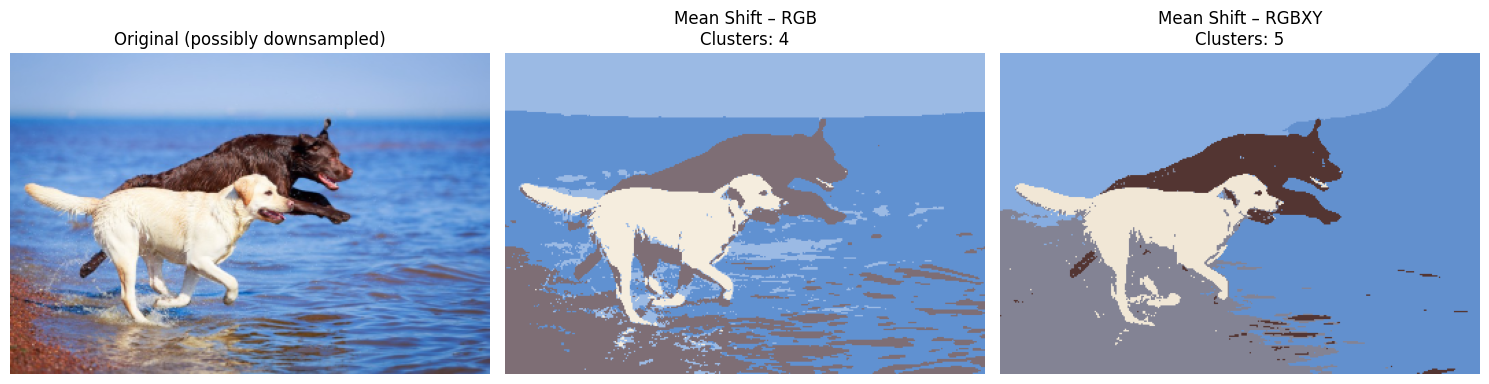


=== Cluster centers in RGB space ===
Number of clusters: 4
Centers (R, G, B):
[[0.37997028 0.56954867 0.8221793 ]
 [0.6109339  0.7298343  0.8976334 ]
 [0.49506038 0.43296108 0.4605579 ]
 [0.9644621  0.9328565  0.87189484]]

=== Cluster centers in RGBXY space ===
Number of clusters: 5
Centers (R, G, B, X, Y):
[[0.3874546  0.5665449  0.8111547  0.7602213  0.60413295]
 [0.5273006  0.6753738  0.87927806 0.27343136 0.17680229]
 [0.5166174  0.51655805 0.5830932  0.2875463  0.8087535 ]
 [0.9451891  0.9080756  0.8425538  0.33172098 0.5401886 ]
 [0.32777753 0.20941196 0.19616185 0.51865715 0.36413208]]


'\nTo compare performance in your report/notebook:\n- Visually compare `seg_rgb` vs `seg_rgbxy`.\n- Typically RGBXY will produce segments that are more spatially coherent\n  (fewer scattered pixels of the same color far apart),\n  because nearby pixels in (x,y) are encouraged to join the same cluster.\n'

In [ ]:
# Your code here"""

# pip install scikit-image

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.io import imread
from skimage.transform import rescale

# -----------------------
# 1. Load and optionally downsample image
# -----------------------

# Try both possible paths (adjust as needed for your notebook)
img_path_candidates = [
    Path("assets/labradors.jpg"),
    Path("/mnt/data/labradors.jpg"),  # path mentioned in the prompt
]

img_path = None
for p in img_path_candidates:
    if p.exists():
        img_path = p
        break

if img_path is None:
    raise FileNotFoundError("Could not find labradors.jpg, check your path.")

image = imread(str(img_path))  # shape: (H, W, 3), RGB
image = image.astype(np.float32) / 255.0  # normalize to [0, 1]

# Optional: downsample for speed (Mean Shift is expensive)
# Set factor=1.0 if you want full resolution.
factor = 0.5
if factor != 1.0:
    image_small = rescale(image, factor, channel_axis=2, anti_aliasing=True)
else:
    image_small = image

H, W, C = image_small.shape
print(f"Working resolution: {H} x {W}, channels={C}")

# -----------------------
# 2. Helper to build feature spaces
# -----------------------

def build_rgb_features(img):
    """
    Build N x 3 feature matrix from RGB image.
    """
    H, W, _ = img.shape
    rgb = img.reshape(-1, 3)  # (N, 3) where N = H*W
    return rgb


def build_rgbxy_features(img):
    """
    Build N x 5 feature matrix: (R, G, B, X, Y).
    X,Y are normalized spatial coordinates.
    """
    H, W, _ = img.shape
    # Color features
    rgb = img.reshape(-1, 3)  # (N, 3)

    # Spatial features
    ys, xs = np.mgrid[0:H, 0:W]  # each is (H, W)
    xs = xs.astype(np.float32) / W  # normalize to [0,1]
    ys = ys.astype(np.float32) / H
    xy = np.stack([xs, ys], axis=-1).reshape(-1, 2)  # (N, 2)

    # Concatenate
    rgbxy = np.concatenate([rgb, xy], axis=1)  # (N, 5)
    return rgbxy

# -----------------------
# 3. Mean Shift segmentation function
# -----------------------

def meanshift_segment(features, quantile=0.1, n_samples=5000):


    # Estimate bandwidth from a sample
    bandwidth = estimate_bandwidth(
        features,
        quantile=quantile,
        n_samples=min(n_samples, len(features)),
        random_state=0,
    )
    print(f"Estimated bandwidth: {bandwidth:.4f}")

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms.fit(features)
    labels = ms.labels_
    centers = ms.cluster_centers_

    n_clusters = len(np.unique(labels))
    print(f"Number of clusters found: {n_clusters}")

    return labels, centers

# -----------------------
# 4. Run Mean Shift in RGB and RGBXY
# -----------------------

# RGB-only features
features_rgb = build_rgb_features(image_small)
print("\n--- Mean Shift in RGB space (3D) ---")
labels_rgb, centers_rgb = meanshift_segment(features_rgb, quantile=0.1)

# RGBXY features
features_rgbxy = build_rgbxy_features(image_small)
print("\n--- Mean Shift in RGBXY space (5D) ---")
labels_rgbxy, centers_rgbxy = meanshift_segment(features_rgbxy, quantile=0.1)

# -----------------------
# 5. Reconstruct segmented images for visualization
# -----------------------

def reconstruct_segmentation(labels, centers, H, W, use_color_only=True):

    centers_rgb = centers[:, :3] if use_color_only else centers
    seg = centers_rgb[labels].reshape(H, W, -1)
    seg = np.clip(seg, 0, 1)
    return seg

seg_rgb = reconstruct_segmentation(labels_rgb, centers_rgb, H, W, use_color_only=True)
seg_rgbxy = reconstruct_segmentation(labels_rgbxy, centers_rgbxy, H, W, use_color_only=True)

# -----------------------
# 6. Show results
# -----------------------

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_small)
axes[0].set_title("Original (possibly downsampled)")
axes[0].axis("off")

axes[1].imshow(seg_rgb)
axes[1].set_title(f"Mean Shift – RGB\nClusters: {len(np.unique(labels_rgb))}")
axes[1].axis("off")

axes[2].imshow(seg_rgbxy)
axes[2].set_title(f"Mean Shift – RGBXY\nClusters: {len(np.unique(labels_rgbxy))}")
axes[2].axis("off")

plt.tight_layout()
plt.show()

# -----------------------
# 7. Print cluster centers
# -----------------------

print("\n=== Cluster centers in RGB space ===")
print(f"Number of clusters: {len(centers_rgb)}")
print("Centers (R, G, B):")
print(centers_rgb[:, :3])  # first 3 dims are RGB

print("\n=== Cluster centers in RGBXY space ===")
print(f"Number of clusters: {len(centers_rgbxy)}")
print("Centers (R, G, B, X, Y):")
print(centers_rgbxy)  # all 5 dims




## IQ2: GAN
In lecture 12, we learnt and implemented GAN in which the generator and discriminator were constructed with only linear layers, and trained using MNIST dataset. We observed that the quality of genereted images was not good, and needed further improvement.

[DCGAN](https://arxiv.org/pdf/1511.06434.pdf) is an extension of the GAN, in which it explicitly uses `convolutional` and `convTransposed` layers in the discriminator and generator, respectively. In other words, DCGAN replaces linear layers in GAN with `conv.` layers in the discriminator, and `convTranspose` layers in the generator.

### IQ2.1-[25 Points] : Implement DCGAN

Use the following guideline to `Implement DCGAN model`:
- `4 conv. layers` in the `discrimimator`.
- `4 convTranspose layers` in the `generator`.
- latent vector `z = 100` and being sample from a `normal` distribution
- Use `batchnorm` in both the generator and the discriminator.
- Use `ReLU` as activation function in generator for all layers except for the output, which uses `Tanh`.
- Use `LeakyReLU` as activation function in the discriminator for all layers.


Train the model
- `MNIST` dataset
- `25` epochs
- batch size of `128`

**`Report the following`**
- Plot both generator and discriminator `losses`.
- Show the visualization of the generated images of `every 5 epochs`

In [9]:
# Your Code Here

import time
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

BATCH_SIZE = 128


image_size = 32  

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # MNIST is single-channel
])

train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)


100.0%
100.0%
100.0%
100.0%


#### Config

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

latent_z = 100

# Hyperparameters
glr = 2e-4
dlr= 2e-4

NUM_EPOCHS = 25
BATCH_SIZE = 128

logging_interval = 50

cuda


In [11]:
# Your Code Here

# --------------------------
# DCGAN Models
# --------------------------

# Weight initialization (DCGAN-style)
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1 or classname.find('ConvTranspose') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


class Generator(nn.Module):
    """
    Input:  z ~ N(0, I), shape (N, latent_z, 1, 1)
    Output: fake image, shape (N, 1, 32, 32) with Tanh
    """
    def __init__(self, z_dim=100, img_channels=1, feature_g=64):
        super().__init__()

        self.net = nn.Sequential(
            # input Z: (N, z_dim, 1, 1)
            nn.ConvTranspose2d(z_dim, feature_g * 4, kernel_size=4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(feature_g * 4),
            nn.ReLU(True),  # (N, 4*ngf, 4, 4)

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_g * 2),
            nn.ReLU(True),  # (N, 2*ngf, 8, 8)

            nn.ConvTranspose2d(feature_g * 2, feature_g, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_g),
            nn.ReLU(True),  # (N, ngf, 16, 16)

            nn.ConvTranspose2d(feature_g, img_channels, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()  # (N, 1, 32, 32)
        )

    def forward(self, z):
        return self.net(z)


class Discriminator(nn.Module):
    """
    Input:  image (N, 1, 32, 32)
    Output: logits (N, 1, 1, 1) -> flattened to (N,)
    """
    def __init__(self, img_channels=1, feature_d=64):
        super().__init__()

        self.net = nn.Sequential(
            # (N, 1, 32, 32)
            nn.Conv2d(img_channels, feature_d, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_d),
            nn.LeakyReLU(0.2, inplace=True),  # (N, 64, 16, 16)

            nn.Conv2d(feature_d, feature_d * 2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2, inplace=True),  # (N, 128, 8, 8)

            nn.Conv2d(feature_d * 2, feature_d * 4, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2, inplace=True),  # (N, 256, 4, 4)

            nn.Conv2d(feature_d * 4, 1, kernel_size=4, stride=1, padding=0, bias=False)
            # (N, 1, 1, 1) -> flatten later
        )

    def forward(self, x):
        return self.net(x)


In [12]:
# Instantiate models
gen = Generator(z_dim=latent_z, img_channels=1, feature_g=64).to(device)
dis = Discriminator(img_channels=1, feature_d=64).to(device)

# Apply DCGAN weight init
gen.apply(weights_init_normal)
dis.apply(weights_init_normal)

# Loss & Optimizers
adversarial_loss = nn.BCEWithLogitsLoss()
optimizer_G = torch.optim.Adam(gen.parameters(), lr=glr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(dis.parameters(), lr=dlr, betas=(0.5, 0.999))

#### Training Loop

In [13]:
log_dict = {'train_generator_loss_per_batch': [],
              'train_discriminator_loss_per_batch': [],
              'train_discriminator_real_acc_per_batch': [],
              'train_discriminator_fake_acc_per_batch': [],
              'images_from_noise_per_epoch': []}

# Batch of latent (noise) vectors for
# evaluating / visualizing the training progress
# of the generator
# -----Your code here ------
fixed_z = torch.randn(64, latent_z, 1, 1, device=device)
# --------------------------

start_time = time.time()
for epoch in range(NUM_EPOCHS):

  gen.train()
  dis.train()
  for batch_idx, (features, _) in enumerate(train_loader):

    batch_size = features.size(0)

    # real images
    real_images = features.to(device)
    real_labels = torch.ones(batch_size, device=device) # real label = 1

    # generated (fake) images

    # -----Your code here ------
    z = torch.randn(batch_size, latent_z, 1, 1, device=device)  

    # --------------------------

    fake_images = gen(z)
    fake_labels = torch.zeros(batch_size, device=device) # fake label = 0
    flipped_fake_labels = real_labels # here, fake label = 1
    flipped_fake_labels.to(device)


    # --------------------------
    # Train Discriminator
    # --------------------------

    optimizer_D.zero_grad()

    # get discriminator loss on real images
    discr_pred_real = dis(real_images).view(-1) # Nx1 -> N
    real_loss = adversarial_loss(discr_pred_real, real_labels)

    # get discriminator loss on fake images
    discr_pred_fake = dis(fake_images.detach()).view(-1)
    fake_loss = adversarial_loss(discr_pred_fake, fake_labels)

    # combined loss
    discr_loss = 0.5*(real_loss + fake_loss)

    discr_loss.backward()
    optimizer_D.step()

    # --------------------------
    # Train Generator
    # --------------------------

    optimizer_G.zero_grad()

    # get discriminator loss on fake images with flipped labels
    discr_pred_fake = dis(fake_images).view(-1)
    gener_loss = adversarial_loss(discr_pred_fake, flipped_fake_labels)
    gener_loss.backward()

    optimizer_G.step()

    # --------------------------
    # Logging
    # --------------------------
    log_dict['train_generator_loss_per_batch'].append(gener_loss.item())
    log_dict['train_discriminator_loss_per_batch'].append(discr_loss.item())

    predicted_labels_real = torch.where(discr_pred_real.detach() > 0., 1., 0.)
    predicted_labels_fake = torch.where(discr_pred_fake.detach() > 0., 1., 0.)

    acc_real = (predicted_labels_real == real_labels).float().mean()*100.
    acc_fake = (predicted_labels_fake == fake_labels).float().mean()*100.

    log_dict['train_discriminator_real_acc_per_batch'].append(acc_real.item())
    log_dict['train_discriminator_fake_acc_per_batch'].append(acc_fake.item())

    if not batch_idx % logging_interval:
      print('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f'
              % (epoch+1, NUM_EPOCHS, batch_idx,
                len(train_loader), gener_loss.item(), discr_loss.item()))

  ### Save images for evaluation
  with torch.no_grad():
    fake_images = gen(fixed_z).detach().cpu()
    log_dict['images_from_noise_per_epoch'].append(make_grid(fake_images,
                                                              padding=2,
                                                              normalize=True))
  print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/025 | Batch 000/469 | Gen/Dis Loss: 1.4474/0.6790
Epoch: 001/025 | Batch 050/469 | Gen/Dis Loss: 6.1582/0.0421
Epoch: 001/025 | Batch 100/469 | Gen/Dis Loss: 5.0164/0.0374
Epoch: 001/025 | Batch 150/469 | Gen/Dis Loss: 3.9675/0.0696
Epoch: 001/025 | Batch 200/469 | Gen/Dis Loss: 3.2854/0.0855
Epoch: 001/025 | Batch 250/469 | Gen/Dis Loss: 2.9009/0.1774
Epoch: 001/025 | Batch 300/469 | Gen/Dis Loss: 3.2171/0.0912
Epoch: 001/025 | Batch 350/469 | Gen/Dis Loss: 3.3761/0.0744
Epoch: 001/025 | Batch 400/469 | Gen/Dis Loss: 3.1595/0.0766
Epoch: 001/025 | Batch 450/469 | Gen/Dis Loss: 3.3665/0.0471
Time elapsed: 0.85 min
Epoch: 002/025 | Batch 000/469 | Gen/Dis Loss: 1.5748/0.3874
Epoch: 002/025 | Batch 050/469 | Gen/Dis Loss: 2.9866/0.0764
Epoch: 002/025 | Batch 100/469 | Gen/Dis Loss: 2.1745/0.2351
Epoch: 002/025 | Batch 150/469 | Gen/Dis Loss: 1.9303/0.1186
Epoch: 002/025 | Batch 200/469 | Gen/Dis Loss: 2.1590/0.1795
Epoch: 002/025 | Batch 250/469 | Gen/Dis Loss: 1.6809/0.1426
E

KeyboardInterrupt: 

#### Visualize the results

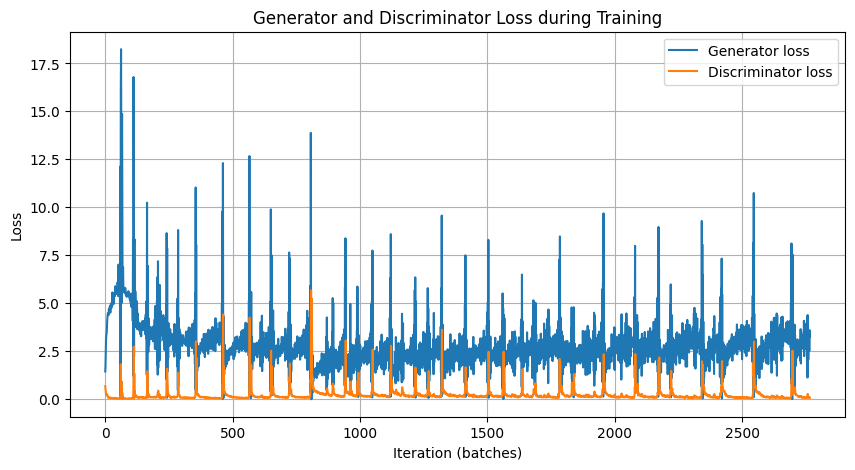

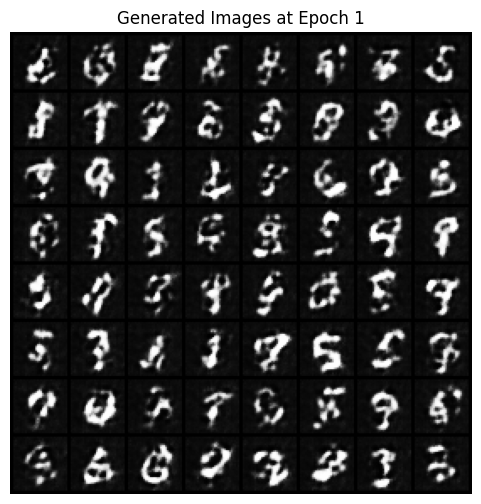

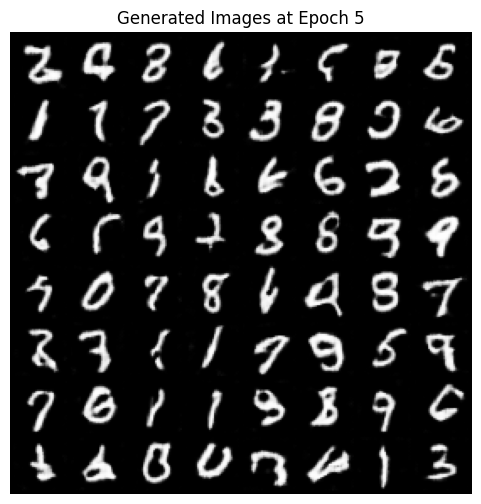

In [15]:
# 1) Plot Generator & Discriminator Loss
plt.figure(figsize=(10, 5))
plt.plot(log_dict['train_generator_loss_per_batch'], label='Generator loss')
plt.plot(log_dict['train_discriminator_loss_per_batch'], label='Discriminator loss')
plt.xlabel('Iteration (batches)')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Loss during Training')
plt.legend()
plt.grid(True)
plt.show()

# 2) Show generated images every 5 epochs
#    (epochs are 0-indexed in log_dict['images_from_noise_per_epoch'])
for epoch_idx, img_grid in enumerate(log_dict['images_from_noise_per_epoch']):
    if (epoch_idx + 1) % 5 == 0 or epoch_idx == 0 or epoch_idx == NUM_EPOCHS - 1:
        plt.figure(figsize=(6, 6))
        plt.imshow(img_grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title(f'Generated Images at Epoch {epoch_idx + 1}')
        plt.show()

### IQ2.2-[10 Points]: Qualitative Comparison


Recall from our GAN lab session, we implemented and trained GAN on MNIST dataset.

Conduct a comparative analysis of the image outputs generated by `GAN` and `DCGAN` models at the `25th` epoch. Determine which model produces better quality images and discuss the underlying reasons for its superior performance.

Your answer here